In [1]:
# Computations
import numpy as np
import pandas as pd
import copy
import random

# Imputing Data
from sklearn.impute import SimpleImputer

## Text
from colorama import Fore, Back, Style
from IPython.display import display, Markdown, Latex

# plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">
<font size="+3"><b>
Preprocessing Data in Python
</b></font>
</div>


* [Dealing with Missing Data](#Dealing-with-Missing-Data)
    * [Imputing missing values using the mean strategy](#Imputing-missing-values-using-the-mean-strategy)
    * [Imputing missing values using the median strategy](#Imputing-missing-values-using-the-median-strategy)
    * [Imputing missing values using the most frequent strategy](#Imputing-missing-values-using-the-most-frequent-strategy)
    * [Comparing the strategies](#Comparing-the-strategies)

Consider the [advertising example](https://hatefdastour.github.io/files/Statistical_Learning/Linear_Regression.html) again.

In [2]:
df = pd.read_csv('Data/Advertising.csv')
display(df.head())

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

We are going to randomly add **NaN** values to the data, and call the resulting data the corrupted data.

In [3]:
dfC=copy.deepcopy(df)
# nr: the number of rows
# nc: the number of columns
[nr,nc]=np.shape(dfC)
# Corrupting 20 cells
N_corrupted=20
for i in range(N_corrupted):
    dfC.iloc[[random.randint(1,nr-1)],[random.randint(1,nc-1)]]=np.nan
    
# the corrupted data
display(dfC.head())

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

As can be seen, some of the data are in forms of *NaN*. NaN stands for *Not a Number*. Thus, we need to preprocess the data to analyze them using statistical tools.

## Dealing with Missing Data

We can use the [[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)] for imputing missing values. This can be done by a provided constant value or using the statistics (mean, median, or mode (most frequent)) of each column.

### Imputing missing values using the mean strategy

First, we are going to implement SimpleImputer with the mean strategy.

In [4]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
## imputing the data
X=imp_mean.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_mean.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_mean=copy.deepcopy(df)
df_imp_mean.iloc[:,:-1]=X
df_imp_mean.iloc[:,-1]=Y
del X, Y
df_imp_mean.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Thus, we have managed to impute those NaN values using SimpleImputer with the mean strategy. Now we can analyze it using statistical tools.

To compare it with the original Data, we can

In [5]:
df_imp_mean.where(df_imp_mean.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True       True   True
2  True   True       True   True
3  True   True       True   True
4  True   True       True   True

### Imputing missing values using the median strategy

Next, we can implement try the median strategy.

In [6]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
## imputing the data
X=imp_median.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_median.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_median=copy.deepcopy(df)
df_imp_median.iloc[:,:-1]=X
df_imp_median.iloc[:,-1]=Y
del X, Y
df_imp_median.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Comparing with the original data:

In [7]:
df_imp_median.where(df_imp_median.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True       True   True
2  True   True       True   True
3  True   True       True   True
4  True   True       True   True

### Imputing missing values using the most frequent strategy

Finally, the most frequent strategy:

In [8]:
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
## imputing the data
X=imp_mf.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_mf.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_mf=copy.deepcopy(df)
df_imp_mf.iloc[:,:-1]=X
df_imp_mf.iloc[:,-1]=Y
del X, Y
df_imp_mf.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Comparing with the original data:

In [9]:
df_imp_mf.where(df_imp_mf.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True       True   True
2  True   True       True   True
3  True   True       True   True
4  True   True       True   True

### Comparing the strategies

To compare the accuray, we can use the following norm.

$$\max\left(\left| \text{Original Data}-\text{Imputed Data}\right|\right)$$

In [10]:
def myNorm(Imputed, Original = df.values): return np.max(np.abs(Original-Imputed))

# Norm: the mean strategy
display(Latex(r'$\max\left(\left| \text{Original Data}-\text{Imputed Data using the Mean Strategy}\right|\right)$ = %.4f'
% myNorm(df_imp_mean.values)))

# Norm: the median
display(Latex(r'$\max\left(\left| \text{Original Data}-\text{Imputed Data using the Median Strategy}\right|\right)$ = %.4f'
% myNorm(df_imp_median.values)))

# Norm: the median
display(Latex(r'$\max\left(\left| \text{Original Data}-\text{Imputed Data using the Most Frequent Strategy}\right|\right)$ = %.4f'
% myNorm(df_imp_mf.values)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

As can be seen, here, the mean strategy has provided the best results. Although, on a different example, other strategies might perform better than the mean strategy.

Now Plots:

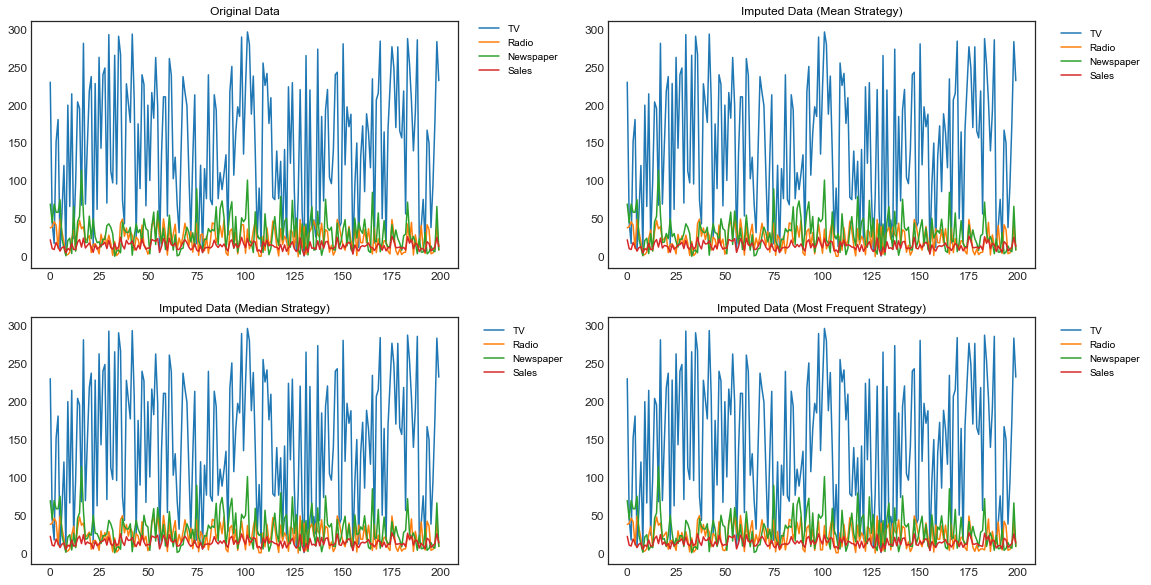

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), sharex=False)
#
_ = df.plot(ax=ax[0,0])
_ = ax[0,0].set_title('Original Data')
_ = ax[0,0].legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
#
_ = df_imp_mean.plot(ax=ax[0,1])
_ = ax[0,1].set_title('Imputed Data (Mean Strategy)')
_ = ax[0,1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#
_ = df_imp_median.plot(ax=ax[1,0])
_ = ax[1,0].set_title('Imputed Data (Median Strategy)')
_ = ax[1,0].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#
_ = df_imp_mf.plot(ax=ax[1,1])
_ = ax[1,1].set_title('Imputed Data (Most Frequent Strategy)')
_ = ax[1,1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.subplots_adjust(wspace=0.35)

***